In [1]:
import cobra
import pandas as pd
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import copy
import random
import sys
from cobra.io import read_sbml_model, load_json_model
from cobra.flux_analysis import single_gene_deletion, single_reaction_deletion
from copy import deepcopy
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from IPython.core.display import Image 
from scipy.spatial import distance
#from hcluster import linkage, to_tree
#import PyQt5
#from ete3 import Tree, TreeStyle, TextFace, NodeStyle, add_face_to_node
from Bio import Phylo
from io import StringIO
#import libsbml
from cobra import Model, Reaction, Metabolite
import seaborn as sns; sns.set(color_codes=True)
from Bio.KEGG import REST
from Bio.KEGG import Compound
from scipy.spatial import distance
from scipy.cluster import hierarchy
import matplotlib.cm as cm

In [81]:
print(geneEX.index.tolist()[600:700])

['prgI', 'spaS', 'spaR', 'prgJ', 'spaO', 'invJ', 'invI', 'STM2379', 'ahpC', 'sitC', 'yebA', 'envE', 'ydhJ', 'emrD', 'yegQ', 'yaaY', 'hisF', 'ycaQ', 'hisB', 'hisH', 'leuD', 'hisA', 'ydjN', 'yeaN', 'oppD', 'deoA', 'ribB', 'hslJ', 'hisD', 'hisC', 'iroD', 'iroE', 'yjbF', 'STM0611', 'cysP', 'ynhG', 'STM0610', 'cysH', 'STM2923', 'cedA', 'ydiS', 'nifJ', 'rpoS', 'sufS', 'ynhA', 'STM0612', 'cysA', 'sitD', 'cysD', 'sufC', 'cysW', 'sufD', 'ddg', 'cysI', 'envF', 'virK', 'oadG', 'glpR', 'ccmG', 'ccmF', 'fadR', 'STM3691', 'ycdY', 'ydiU', 'STM1792', 'yihO', 'STM0573', 'aceB', 'yccV', 'mobB', 'STM4575', 'htgA', 'STM2655', 'trbH', 'PSLT107', 'SL2635', 'STM4494', 'hofB', 'STM3779', 'ycbB', 'yabN', 'STM3031', 'yebF', 'PSLT032', 'STM2904', 'STM3690', 'STM2695', 'yneG', 'cof', 'traH', 'trbB', 'STM1827', 'acs', 'lldR', 'lldD', 'lldP', 'STM0575', 'yhcN', 'SL2710', 'yraR']


In [78]:
rpoS_loc 

642

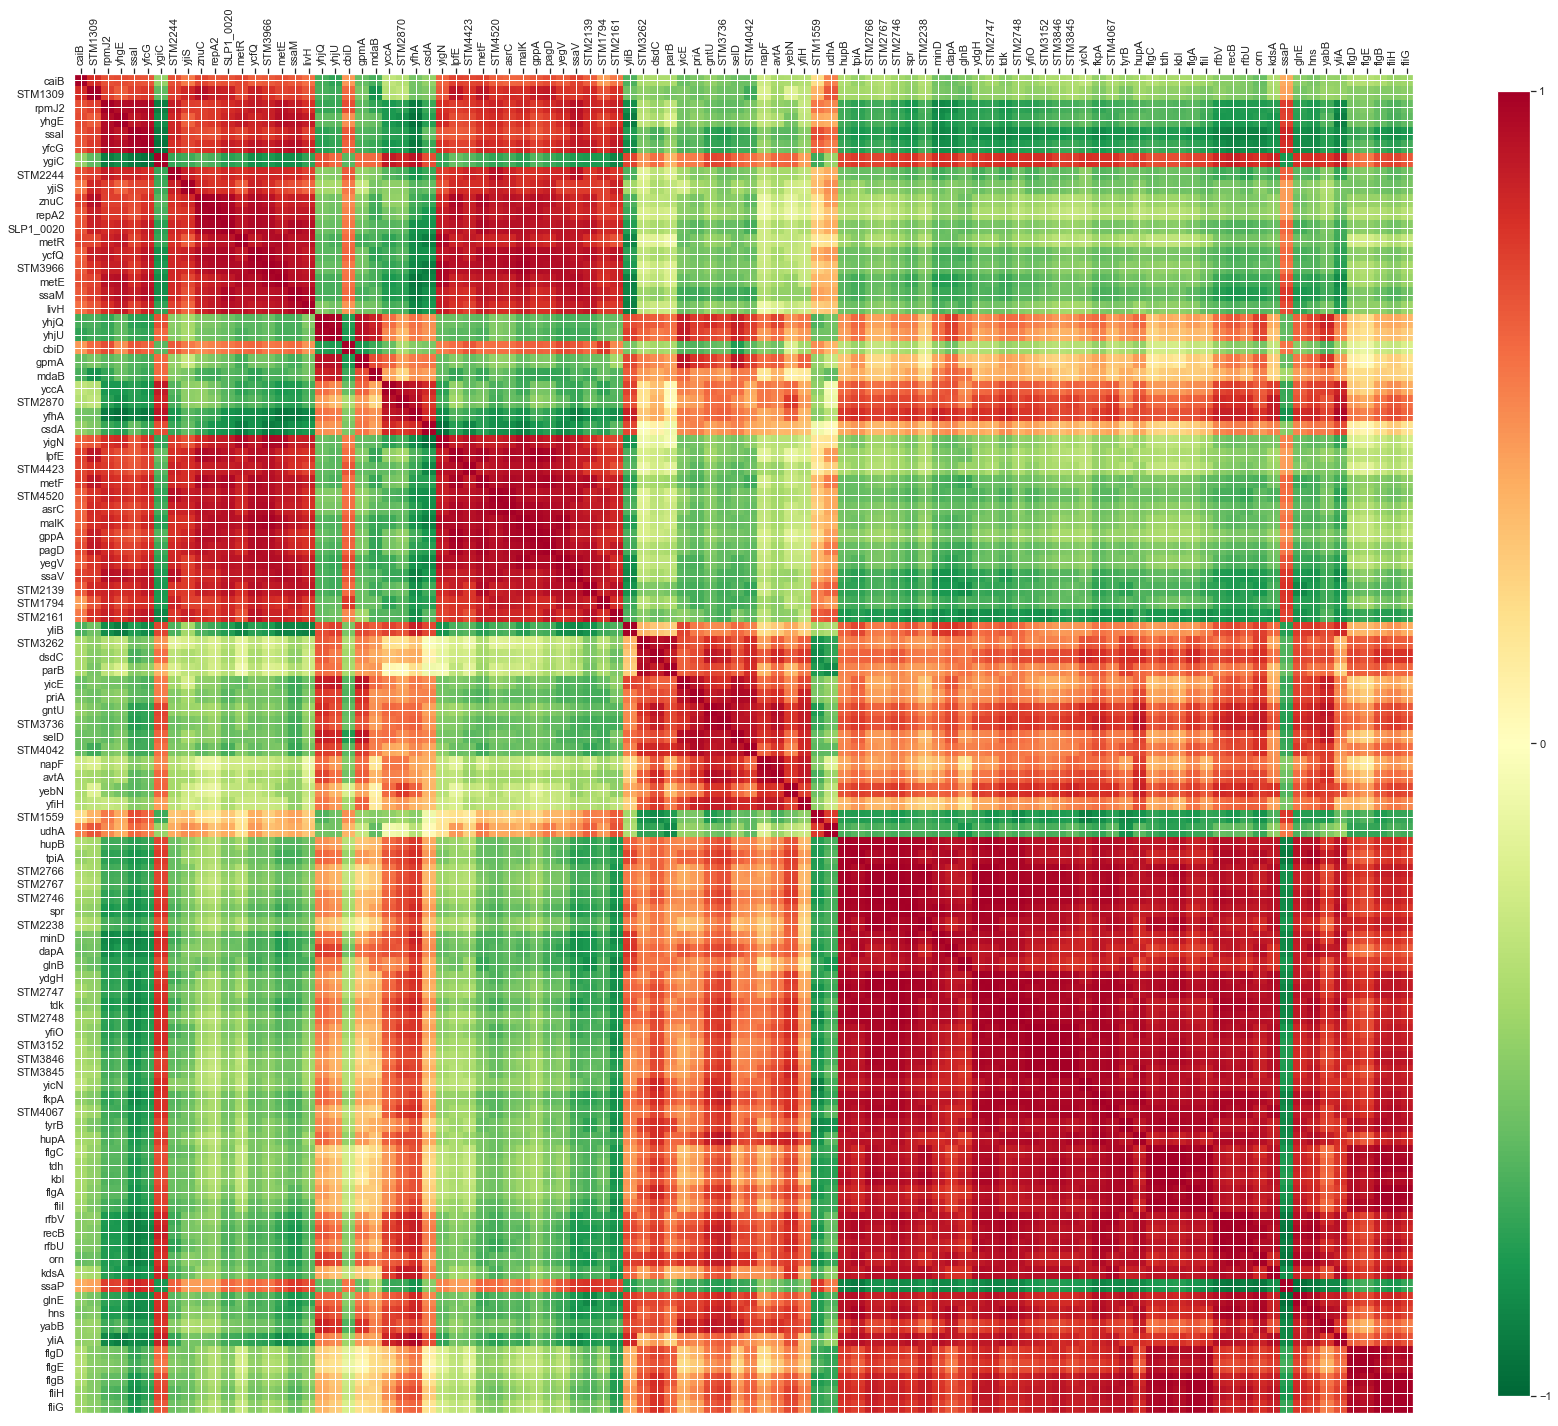

In [77]:
geneEX =pd.read_excel('./SuppTables_v2.xlsx')
geneEX = geneEX[~geneEX.index.duplicated()] # remove duplicate values
X = np.abs(geneEX.transpose().corr().values) # pearson
d = sch.distance.pdist(X,'cityblock')
L = sch.linkage(d, method='average')
ind = sch.fcluster(L, 0*d.max(), 'distance')
rows = [geneEX.index.tolist()[i] for i in list((np.argsort(ind)))]
geneEX = geneEX.reindex(rows, axis=0)

rpoS_loc = geneEX.index.get_loc('rpoS')
maxgene2show = 100
selected_corr = geneEX.iloc[0:maxgene2show].transpose().corr()

size=30
fig, ax = plt.subplots(figsize=(size, size))
plt.imshow(selected_corr, cmap='RdYlGn_r')
plt.xticks(range(maxgene2show), selected_corr.index.tolist()[0:maxgene2show], rotation=90);
plt.yticks(range(maxgene2show), selected_corr.index.tolist()[0:maxgene2show]);
ax.xaxis.tick_top()
    
# Add the colorbar legend
cbar = plt.colorbar(ticks=[-1, 0, 1], aspect=40, shrink=.8)
plt.clim(-1,1)



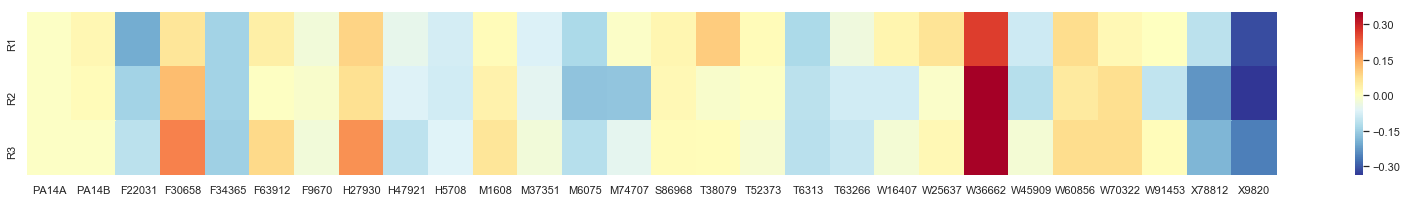

In [122]:
peakArea_cit = plot_heatmap_metabolic('Citrate')

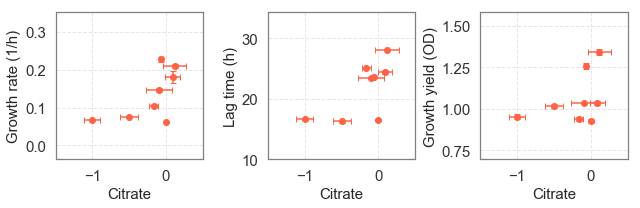

In [140]:
plot_metabolite_growth_corr(peakArea_cit,'Citrate', [-1.5,0.5])

## Galactono-1,4-lactone

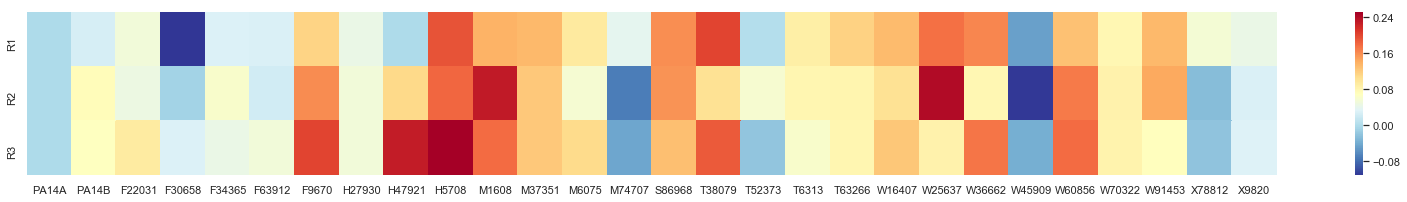

In [115]:
peakArea_g14l = plot_heatmap_metabolic('Galactono-1,4-lactone')

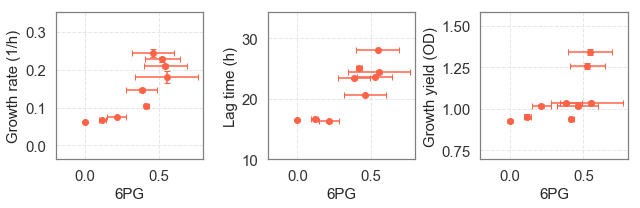

In [139]:
plot_metabolite_growth_corr(peakArea_g14l,'6PG', [-0.2,0.8])

## Acetylmuramate

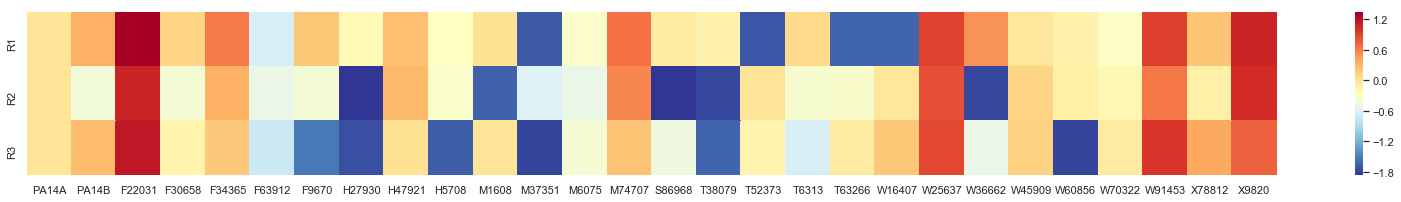

In [58]:
peakArea_amur = plot_heatmap_metabolic('Acetylmuramate')

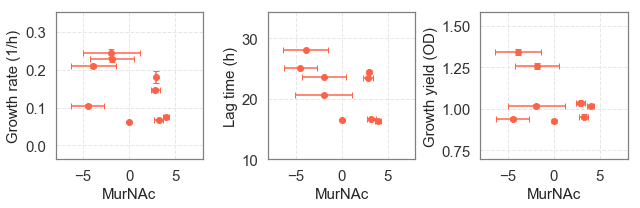

In [59]:
plot_metabolite_growth_corr(peakArea_amur,'MurNAc', [-8,8])

## GABA

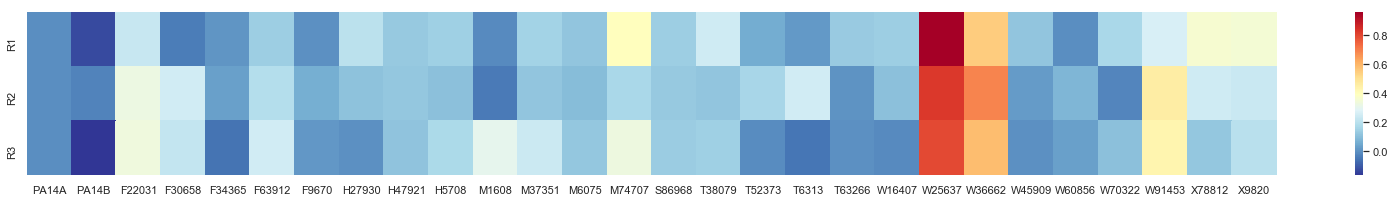

In [60]:
peakArea_gaba = plot_heatmap_metabolic('3-Amino-isobutanoate 1')

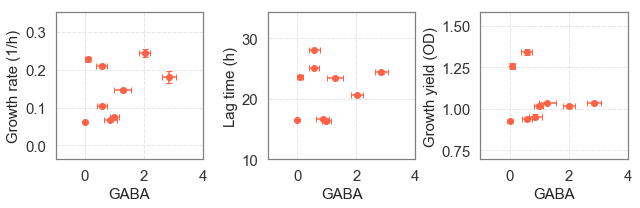

In [63]:
plot_metabolite_growth_corr(peakArea_gaba,'GABA',[-1,4])

## Succinate

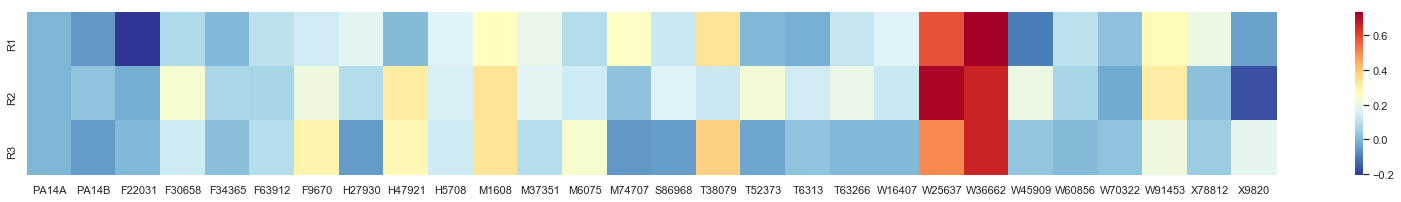

In [64]:
peakArea_succ = plot_heatmap_metabolic('succinate')

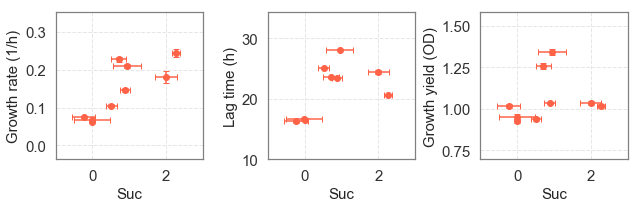

In [141]:
plot_metabolite_growth_corr(peakArea_succ,'Suc',[-1,3])

## Hypoxanthine

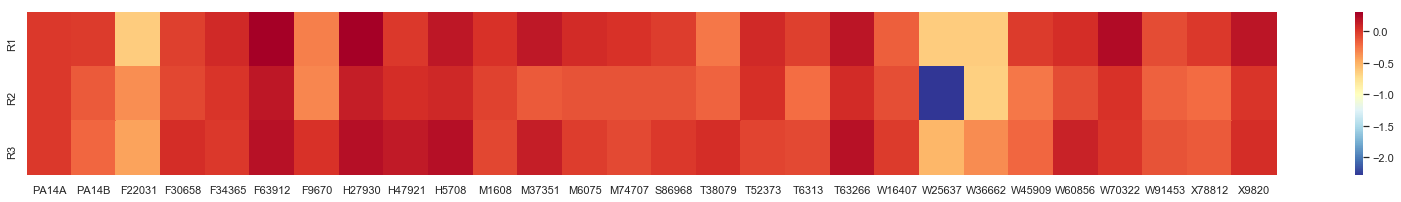

In [67]:
peakArea_hyxn = plot_heatmap_metabolic('hypoxanthine')

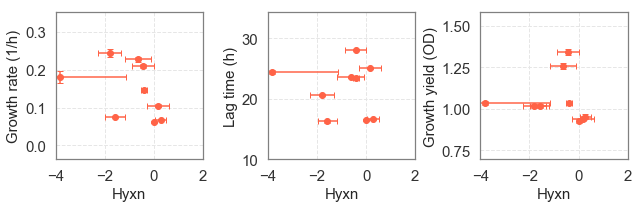

In [72]:
plot_metabolite_growth_corr(peakArea_hyxn,'Hyxn',[-4,2])

## AICAR

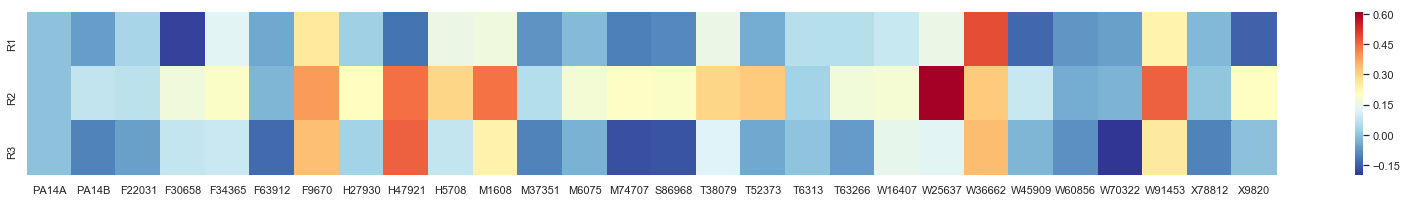

In [73]:
peakArea_aicar = plot_heatmap_metabolic('AICAR')

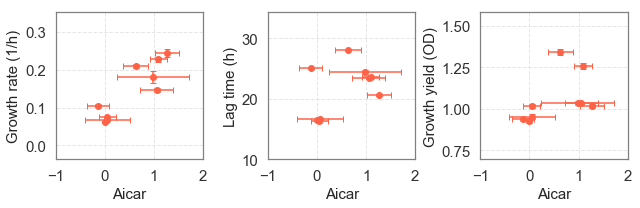

In [76]:
plot_metabolite_growth_corr(peakArea_aicar,'Aicar',[-1,2])

## O-Acetyl-L-homoserine

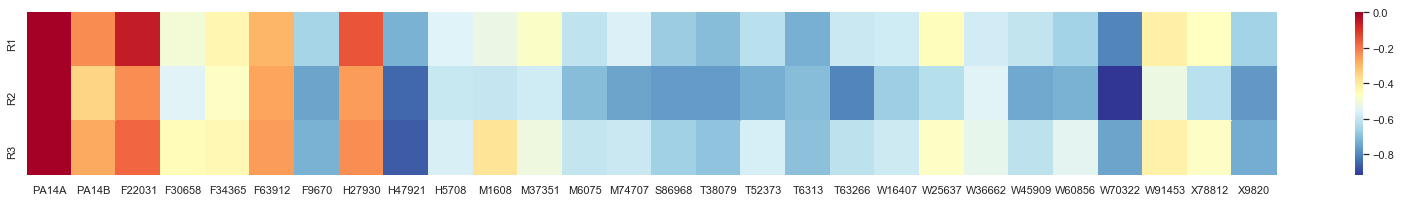

In [77]:
peakArea_achser = plot_heatmap_metabolic('Acetylhomoserine 2')

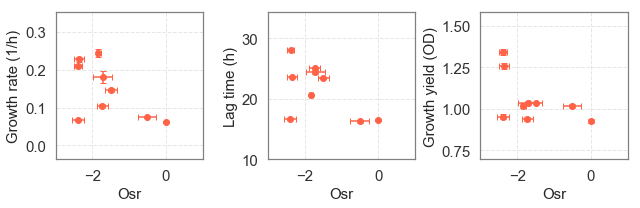

In [80]:
plot_metabolite_growth_corr(peakArea_achser,'Osr',[-3,1])

## Pyrrole-2-carboxylate

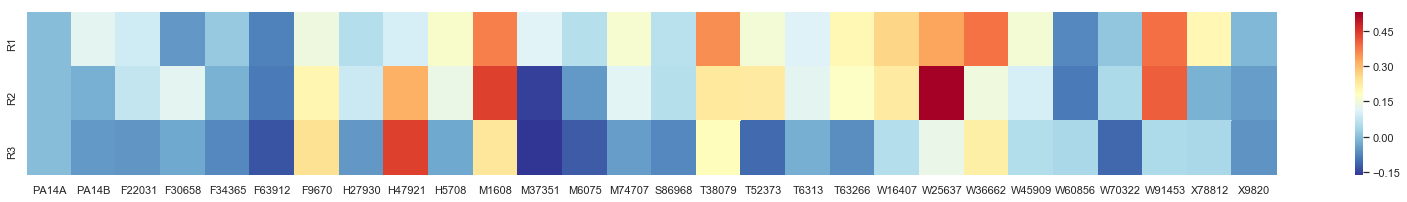

In [82]:
peakArea_p2car = plot_heatmap_metabolic('Pyrrole-2-carboxylate')

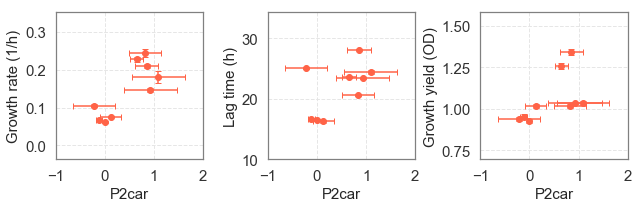

In [85]:
plot_metabolite_growth_corr(peakArea_p2car,'P2car',[-1,2])

## Succinate semialdehyde 1

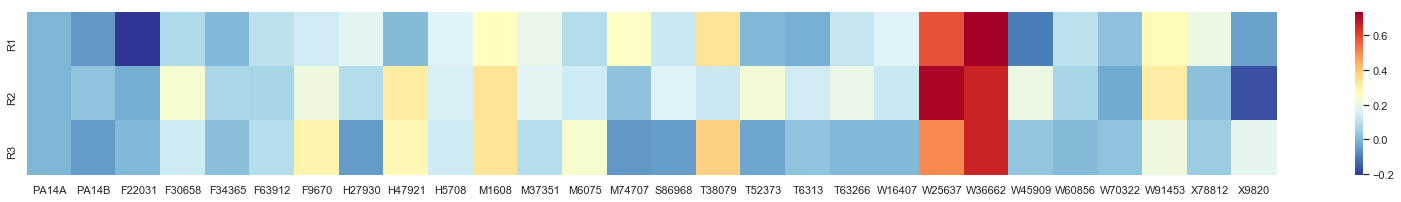

In [86]:
peakArea_usccsa = plot_heatmap_metabolic('succinate semialdehyde 1')

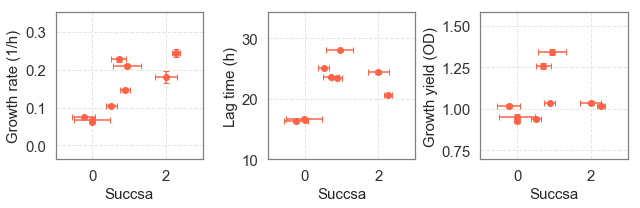

In [88]:
plot_metabolite_growth_corr(peakArea_usccsa,'Succsa',[-1,3])

## FBP

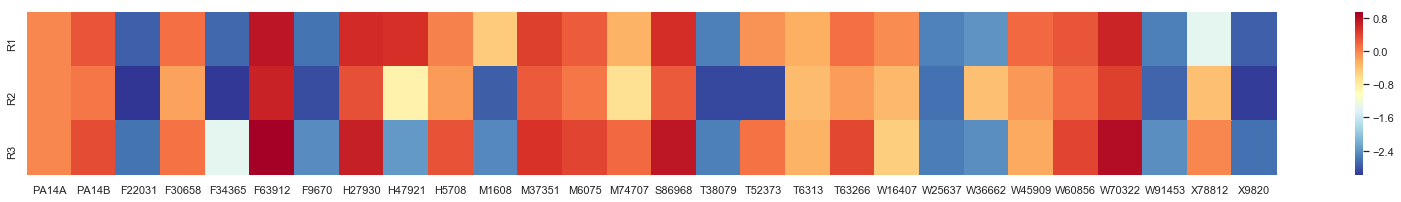

In [89]:
peakArea_fbp = plot_heatmap_metabolic('hexose diphosphate')

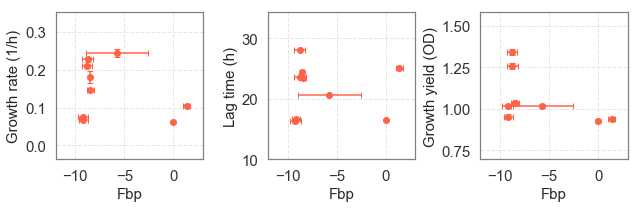

In [95]:
plot_metabolite_growth_corr(peakArea_fbp,'Fbp',[-12,3])

## Methylcitrate 1

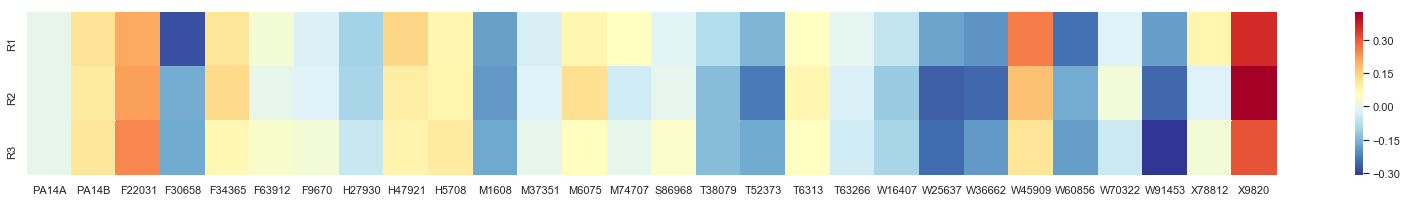

In [96]:
peakArea_methycit = plot_heatmap_metabolic('Methylcitrate 1')

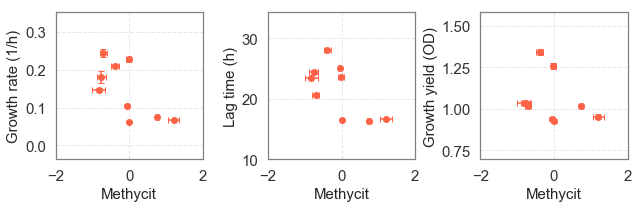

In [98]:
plot_metabolite_growth_corr(peakArea_methycit,'Methycit',[-2,2])

## 2-Aminoacrylate

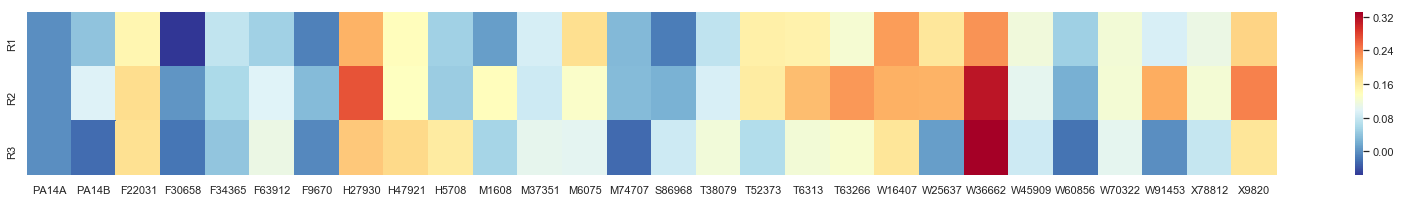

In [99]:
peakArea_2AA = plot_heatmap_metabolic('2-Aminoacrylate')

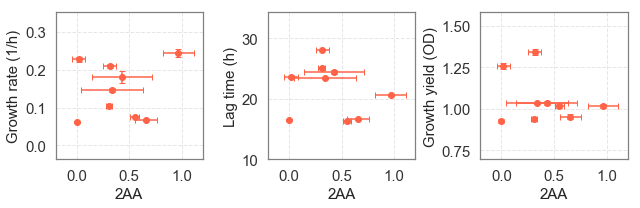

In [102]:
plot_metabolite_growth_corr(peakArea_2AA,'2AA',[-0.2,1.2])

# Plot subgroup correlation

In [4]:
def plot_subgroup_correlation(group):
    metPA=pd.read_excel('../data/Normalized_annotated_metabolomics_ratio2PA14_tidy.xlsx')
    metPA=metPA[group]

    # select metabolaites with confidence level >0
    metInfo=pd.read_excel('../data/identified_compounds_id_name_v1.xlsx')
    index = [metInfo[metInfo['Metabolic_identifier']==i].index for i in group]
    new_column_names=[]
    for i in range(len(group)):
        new_column_names.append(metInfo['Confirmed_print_name'][index[i]].tolist()[0])
    metPA.columns = new_column_names
    
    corr = metPA.corr()

    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(len(group), len(group)))
    plt.imshow(corr, cmap='RdYlGn_r')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=15);
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize=15);
    ax.xaxis.tick_top()
    
    # Add the colorbar legend
    cbar = plt.colorbar(ticks=[-1, 0, 1], aspect=40, shrink=.8)
    plt.clim(-1,1)

In [5]:
def plot_subgroup_variance(group):
    
    metPA=pd.read_excel('../data/Normalized_annotated_metabolomics_ratio2PA14_tidy.xlsx')

    # select metabolaites with confidence level >0
    metInfo=pd.read_excel('../data/identified_compounds_id_name_v1.xlsx')
    conf_index = [metInfo['Metabolic_identifier'].tolist().index(met_id) for met_id in group]
    #print(conf_index)
    metPA_conf = pd.DataFrame(metPA.values[:,conf_index])
    #print(metPA_conf)
    metPA_conf.index = metPA.index
    metPA_conf.columns = [metInfo['Metabolic_identifier'][i] for i in conf_index]
    #print(metPA_conf)
    metPA_conf = metPA_conf.transpose() # metabolites x samples
    
#     metPA_arr = copy.deepcopy(metPA_conf.values)
#     print(metPA_arr[0,:])
#     print(metPA_arr[27,:])
#     print(metPA_arr.shape)
#     for column_index in range(len(group)):
#         norm_R1=copy.deepcopy(metPA_arr[0,column_index])
#         norm_R2=copy.deepcopy(metPA_arr[28,column_index])
#         norm_R3=copy.deepcopy(metPA_arr[56,column_index])
#         print(norm_R1,norm_R2,norm_R3)
#         for row_index in range(84):        
#             if row_index <= 27:
#                 print(metPA_arr[row_index,column_index])
#                 metPA_arr[row_index,column_index]/=norm_R1
#                 print(metPA_arr[row_index,column_index])
#             elif row_index <= 55:
#                 metPA_arr[28:55,column_index]/=norm_R2
#             elif row_index <=83:
#                 metPA_arr[56:83,column_index]/=norm_R3
#     print(metPA_arr)
#     metPA_conf_new = pd.DataFrame(metPA_arr)
#     metPA_conf_new.index = metPA_conf.index
#     metPA_conf_new.columns = metPA_conf.columns
#     metPA_conf_new = metPA_conf_new.transpose()
    
    fig = plt.figure(figsize=(len(group),len(group)/2))
    ax = fig.add_subplot(111)
    blue_circle = dict(markerfacecolor='#71C671', marker='o')
    bplot = ax.boxplot(np.log2(metPA_conf), flierprops=blue_circle, patch_artist=True)
    
    for index, row in metPA_conf.iterrows():
        print(index, np.max(row)/np.min(row))
    
    # fill with colors
    colors = ['#FA8072']*len(metPA_conf.columns)
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
    plt.xticks(range(1,len(metPA_conf.index)+1),metPA_conf.index,rotation='vertical',fontsize=15)
    #plt.yticks([-10,0,10,20],['-10','0','10','20'],fontsize=15)
    ax.set_facecolor('#B2DFEE')

    # adding horizontal grid lines
    ax.yaxis.grid(True)
    #ax.set_xlabel('Metabolites', fontsize=20)
    ax.set_ylabel('log2 (FC)', fontsize=20)

## Peptidoglycan biosynthesis

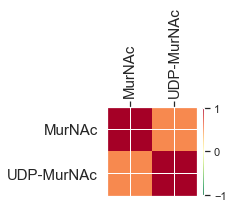

In [14]:
# group = ['Hexose phosphates',
#          'Acetylmuramate',
#          'UDP-N-acetylmuramate',
#          '2,6-Diaminoheptanedioate 1',
#          'glutamine',
#          'glutamate',
#          'd-ala-d-ala 2',
#          'alanine 1',
#         ]
group = ['Acetylmuramate',
         'UDP-N-acetylmuramate'
        ]
plot_subgroup_correlation(group)

F6P/G6P 4.190895240789534
MurNAc 1597.85384506945
UDP-MurNAc 3141.129328299692
2,6-Diaminopimelate 3.7797135419013768
Glutamate 2.053540848244957
Ala-Ala 2.5862256748223866
Alanine 4.149616043046066


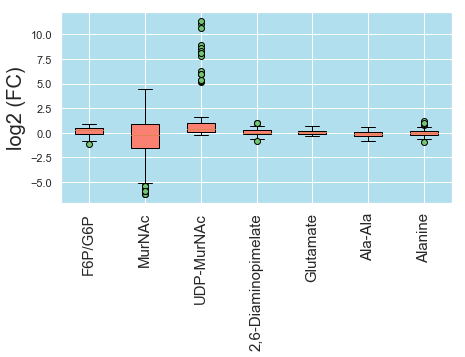

In [209]:
plot_subgroup_variance(group)

# Nucleotide synthesis

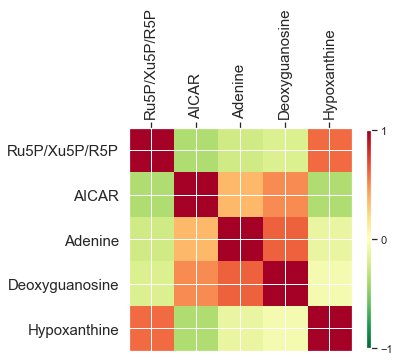

In [263]:
group = ['pentose 5-phosphate',
         'AICAR',
         'Adenine',
         'deoxyguanosine 1',
         'hypoxanthine',
        ]
plot_subgroup_correlation(group)

Ru5P/Xu5P/R5P 5.904222753173981
AICAR 6.440785523744896
Adenine 11.497092378404343
Deoxyguanosine 4.637974909365118
Hypoxanthine 386.15211436337245


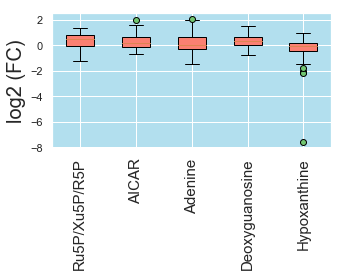

In [262]:
plot_subgroup_variance(group)

## Glucogenesis and pentose phosphate pathway

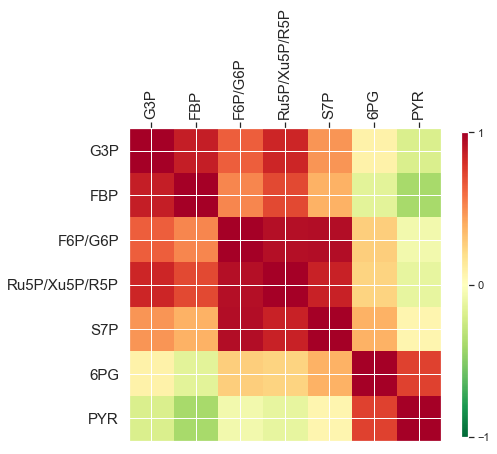

In [7]:
group = ['glyceraldehyde3p',
         'hexose diphosphate',
         'Hexose phosphates', 
         'pentose 5-phosphate',
         'Sedoheptulose 7-phosphate 1',
         'Galactono-1,4-lactone',
         'Pyruvate'
        ]
plot_subgroup_correlation(group)

G3P 613.958361519932
FBP 8674.520290045752
F6P/G6P 4.190895240789534
Ru5P/Xu5P/R5P 5.904222753173981
S7P 6.3008880727395855
6PG 2.2951090803790386
Pyruvate 3.472915286443282


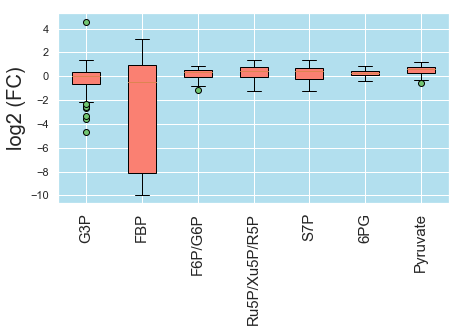

In [138]:
plot_subgroup_variance(group)

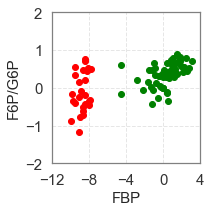

In [32]:
metPA=pd.read_excel('../data/Normalized_annotated_metabolomics_ratio2PA14_tidy.xlsx')
group = ['hexose diphosphate','Hexose phosphates'] 

# select metabolaites with confidence level >0
metInfo=pd.read_excel('../data/identified_compounds_id_name_v1.xlsx')
conf_index = [metInfo['Metabolic_identifier'].tolist().index(met_id) for met_id in group]
metPA_conf = pd.DataFrame(metPA.values[:,conf_index])
metPA_conf.index = metPA.index
metPA_conf.columns = [metInfo['Confirmed_print_name'][i] for i in conf_index]
metPA_conf = metPA_conf.transpose().values# metabolites x samples

fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
plt.xlabel("FBP",fontsize=ft)
plt.ylabel("F6P/G6P",fontsize=ft)
thres = 0.01
h1 = plt.scatter(np.log2([i for i in metPA_conf[0,:] if i < thres]), 
                 np.log2([metPA_conf[1,idx] for idx,i in enumerate(metPA_conf[0,:]) if i < thres]),color='red')
h1 = plt.scatter(np.log2([i for i in metPA_conf[0,:] if i >= thres]), 
                 np.log2([metPA_conf[1,idx] for idx,i in enumerate(metPA_conf[0,:]) if i >= thres]),color='green')
plt.ylim([-2,2])
plt.xlim([-12,4])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([-2,-1,0,1,2])
plt.xticks([-12,-8,-4,0,4])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')

## Groups with consistent large variance

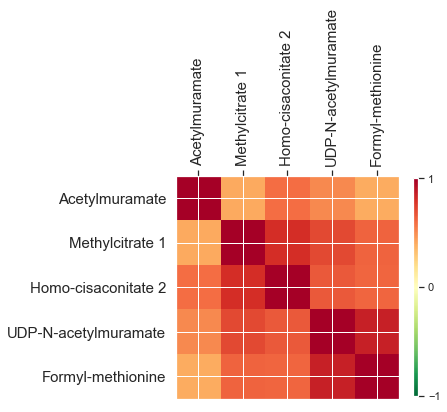

In [74]:
group = ['Acetylmuramate',
         'Methylcitrate 1',
         'Homo-cisaconitate 2',
         'UDP-N-acetylmuramate',
         'Formyl-methionine'
        ]
plot_subgroup_correlation(group)

## Pyruvate/lactate metabolism

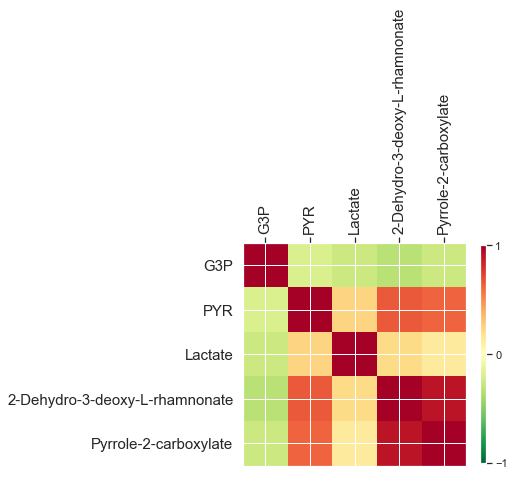

In [15]:
group = ['glyceraldehyde3p',
         'Pyruvate',
         'lactate',
         '2-Dehydro-3-deoxy-L-rhamnonate 3',
         'Pyrrole-2-carboxylate'
        ]
plot_subgroup_correlation(group)

## TCA cycle

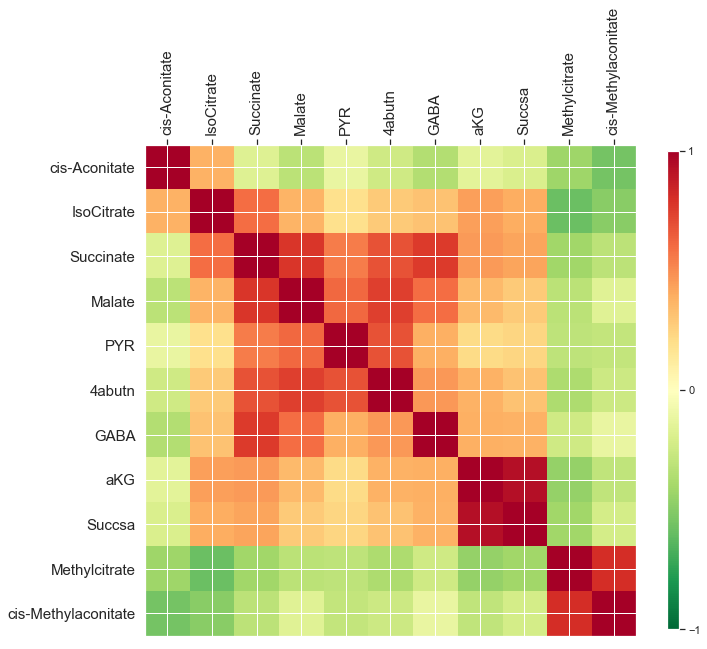

In [43]:
group = ['Cis-aconitate',
         'Citrate',
         'succinate',
         'malate',
         'Pyruvate',
         'Aminobutyraldehyde',
         '3-Amino-isobutanoate 1',
         'ketoglutarate',
         'succinate semialdehyde 1',        
         'Methylcitrate 1',
         'Homo-cisaconitate 2'
        ]
plot_subgroup_correlation(group)

## Methionine, isoleucine and lysine metabolism

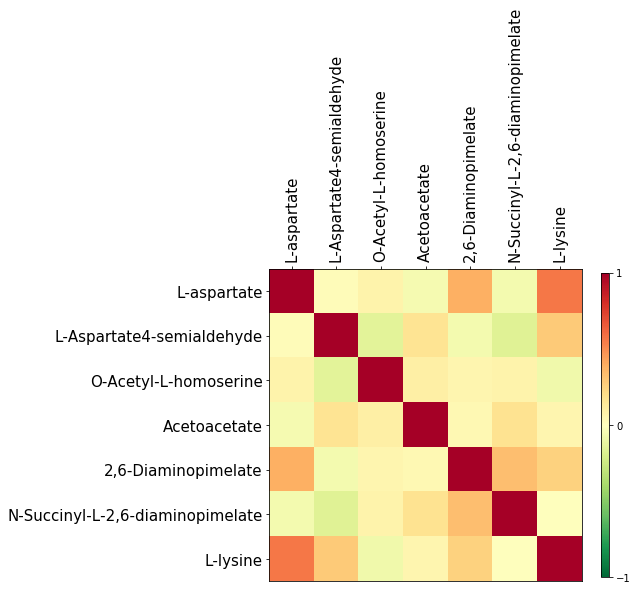

In [59]:
group = ['aspartate',
         'Aspartate 4-semialdehyde',
         'Acetylhomoserine 2',
         '2-Oxobutanoate 2',
         '2,6-Diaminoheptanedioate 1',
         'Succinyl-LL-2,6-diaminopimelate 1',
         'lysine'
        ]
plot_subgroup_correlation(group)

## Alanine and leucine biosynthesis pathway

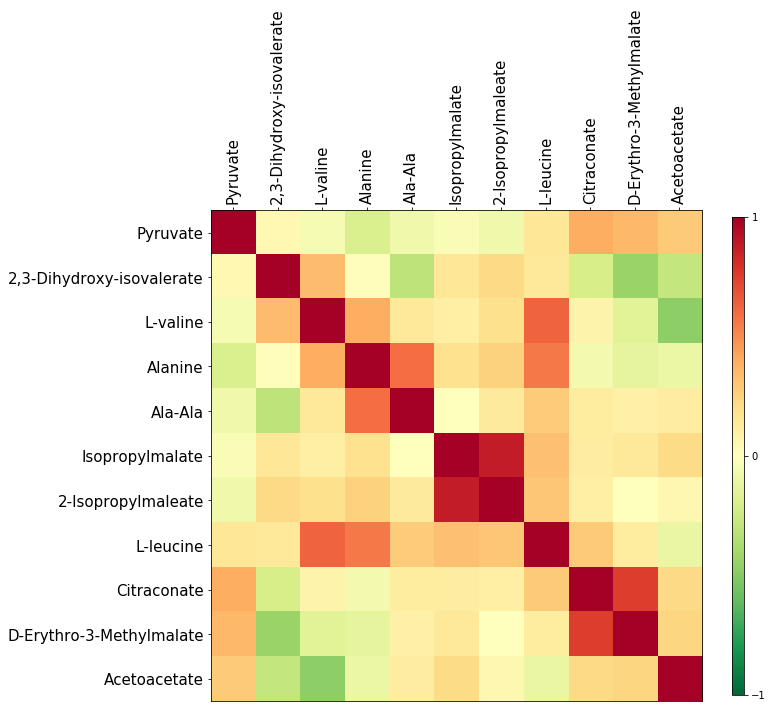

In [60]:
group = ['Pyruvate',
         'Deoxyribose 2',
         'valine',
         'alanine 1',
         'd-ala-d-ala 2',
         'Isopropylmalate',
         'Isopropylmaleate',
         'Leucine',
         'methylmaleate 1',
         'Erithro-3-Methylmalate 2',
         '2-Oxobutanoate 2'        
        ]
plot_subgroup_correlation(group)

## Serine and glycine biosynthesis pathway

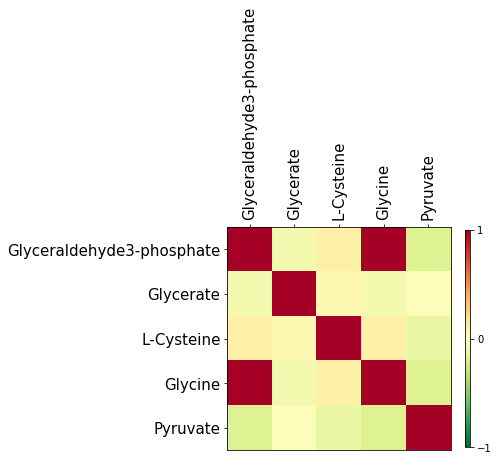

In [62]:
group = ['glyceraldehyde3p',
         'Glycerate',
         'Cysteine',
         'gly',
         'Pyruvate',       
        ]
plot_subgroup_correlation(group)

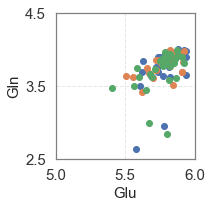

In [92]:
# read glutamine
mData_gln = mData.loc[mData['metabolite'] == 'glutamine']
peakArea_gln = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_gln[:,col] = mData_gln.loc[mData_gln['mutant'] == mut_id,'peakArea']

# read glutamate
mData_glu = mData.loc[mData['metabolite'] == 'glutamate']
peakArea_glu = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_glu[:,col] = mData_glu.loc[mData_glu['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_glu)
plt.xlabel("Glu",fontsize=ft)
df2 = np.log10(peakArea_gln)
plt.ylabel("Gln",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([2.5,4.5])
plt.xlim([5,6])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([2.5,3.5,4.5])
plt.xticks([5,5.5,6])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/glu_gln.svg', format='svg', dpi=1200)

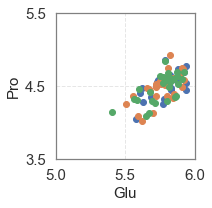

In [94]:
# read proline
mData_pro = mData.loc[mData['metabolite'] == 'proline']
peakArea_pro = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_pro[:,col] = mData_pro.loc[mData_pro['mutant'] == mut_id,'peakArea']

# read glutamate
mData_glu = mData.loc[mData['metabolite'] == 'glutamate']
peakArea_glu = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_glu[:,col] = mData_glu.loc[mData_glu['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_glu)
plt.xlabel("Glu",fontsize=ft)
df2 = np.log10(peakArea_pro)
plt.ylabel("Pro",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([3.5,5.5])
plt.xlim([5,6])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3.5,4.5,5.5])
plt.xticks([5,5.5,6])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/glu_pro.svg', format='svg', dpi=1200)

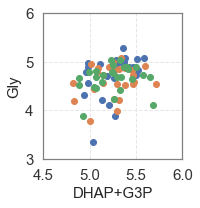

In [110]:
# read hexose Triose-P
mData_triop = mData.loc[mData['metabolite'] == 'glyceraldehyde3p']
peakArea_triop = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_triop[:,col] = mData_triop.loc[mData_triop['mutant'] == mut_id,'peakArea']

# read glycine
mData_gly = mData.loc[mData['metabolite'] == 'gly']
peakArea_gly = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_gly[:,col] = mData_gly.loc[mData_gly['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_triop)
plt.xlabel("DHAP+G3P",fontsize=ft)
df2 = np.log10(peakArea_gly)
plt.ylabel("Gly",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4.5,6])
plt.ylim([3,6])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([4.5,5,5.5,6])
plt.yticks([3,4,5,6])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correla00tion/triose_gly.svg', format='svg', dpi=1200)

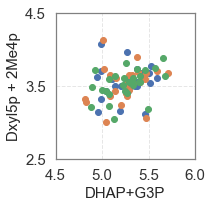

In [125]:
# read hexose Triose-P
mData_triop = mData.loc[mData['metabolite'] == 'glyceraldehyde3p']
peakArea_triop = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_triop[:,col] = mData_triop.loc[mData_triop['mutant'] == mut_id,'peakArea']

# read 2-Deoxy-D-ribose 1-phosphate
mData_dxyl5p = mData.loc[mData['metabolite'] == '2-Deoxy-D-ribose 1-phosphate']
peakArea_dxyl5p = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_dxyl5p[:,col] = mData_dxyl5p.loc[mData_dxyl5p['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_triop)
plt.xlabel("DHAP+G3P",fontsize=ft)
df2 = np.log10(peakArea_dxyl5p)
plt.ylabel("Dxyl5p + 2Me4p",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4.5,6])
plt.ylim([2.5,4.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([4.5,5,5.5,6])
plt.yticks([2.5,3.5,4.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/triose_dxyl5p.svg', format='svg', dpi=1200)

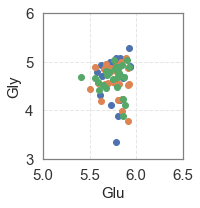

In [112]:
# read glutamate
mData_glu = mData.loc[mData['metabolite'] == 'glutamate']
peakArea_glu = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_glu[:,col] = mData_glu.loc[mData_glu['mutant'] == mut_id,'peakArea']


# read glycine
mData_gly = mData.loc[mData['metabolite'] == 'gly']
peakArea_gly = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_gly[:,col] = mData_gly.loc[mData_gly['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_glu)
plt.xlabel("Glu",fontsize=ft)
df2 = np.log10(peakArea_gly)
plt.ylabel("Gly",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([5,6.5])
plt.ylim([3,6])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([5,5.5,6,6.5])
plt.yticks([3,4,5,6])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/glu_gly.svg', format='svg', dpi=1200)

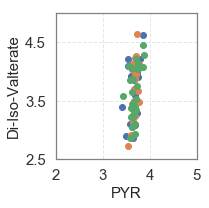

In [119]:
# read 2,3-Dihydroxy-isovalerate
mData_23di = mData.loc[mData['metabolite'] == 'Deoxyribose 2']
peakArea_23di = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_23di[:,col] = mData_23di.loc[mData_23di['mutant'] == mut_id,'peakArea']

# read pyruvate
mData_pyr = mData.loc[mData['metabolite'] == 'Pyruvate']
peakArea_pyr = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_pyr[:,col] = mData_pyr.loc[mData_pyr['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_23di)
plt.ylabel("Di-Iso-Valterate",fontsize=ft)
df1 = np.log10(peakArea_pyr)
plt.xlabel("PYR",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([2.5,5])
plt.xlim([2,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([2.5,3.5,4.5])
plt.xticks([2,3,4,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/pyr_23di.svg', format='svg', dpi=1200)

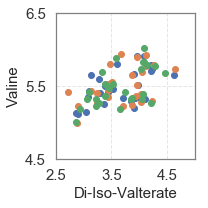

In [127]:
# read 2,3-Dihydroxy-isovalerate
mData_23di = mData.loc[mData['metabolite'] == 'Deoxyribose 2']
peakArea_23di = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_23di[:,col] = mData_23di.loc[mData_23di['mutant'] == mut_id,'peakArea']

# read valine
mData_val = mData.loc[mData['metabolite'] == 'valine']
peakArea_val = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_val[:,col] = mData_val.loc[mData_val['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_23di)
plt.xlabel("Di-Iso-Valterate",fontsize=ft)
df2 = np.log10(peakArea_val)
plt.ylabel("Valine",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([2.5,5])
plt.ylim([4.5,6.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([2.5,3.5,4.5])
plt.yticks([4.5,5.5,6.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/23di_val.svg', format='svg', dpi=1200)

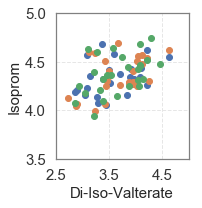

In [130]:
# read 2,3-Dihydroxy-isovalerate
mData_23di = mData.loc[mData['metabolite'] == 'Deoxyribose 2']
peakArea_23di = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_23di[:,col] = mData_23di.loc[mData_23di['mutant'] == mut_id,'peakArea']

# read Isopropylmalate
mData_isoprom = mData.loc[mData['metabolite'] == 'Isopropylmalate']
peakArea_isoprom = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_isoprom[:,col] = mData_isoprom.loc[mData_isoprom['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_23di)
plt.xlabel("Di-Iso-Valterate",fontsize=ft)
df2 = np.log10(peakArea_isoprom)
plt.ylabel("Isoprom",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([2.5,5])
plt.ylim([3.5,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([2.5,3.5,4.5])
plt.yticks([3.5,4,4.5,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/23di_isoprom.svg', format='svg', dpi=1200)

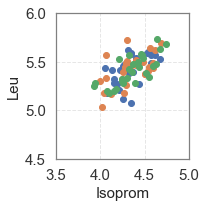

In [135]:
# read leucine
mData_leu = mData.loc[mData['metabolite'] == 'Leucine']
peakArea_leu = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_leu[:,col] = mData_leu.loc[mData_leu['mutant'] == mut_id,'peakArea']

# read Isopropylmalate
mData_isoprom = mData.loc[mData['metabolite'] == 'Isopropylmalate']
peakArea_isoprom = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_isoprom[:,col] = mData_isoprom.loc[mData_isoprom['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_leu)
plt.ylabel("Leu",fontsize=ft)
df1 = np.log10(peakArea_isoprom)
plt.xlabel("Isoprom",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([4.5,6])
plt.xlim([3.5,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([4.5,5,5.5,6])
plt.xticks([3.5,4,4.5,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/isoprom_leu.svg', format='svg', dpi=1200)

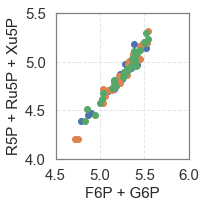

In [140]:
# read hexose phosphate
mData_hexp = mData.loc[mData['metabolite'] == 'Hexose phosphates']
peakArea_hexp = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_hexp[:,col] = mData_hexp.loc[mData_hexp['mutant'] == mut_id,'peakArea']

# read pentose phosphate
mData_p5p = mData.loc[mData['metabolite'] == 'pentose 5-phosphate']
peakArea_p5p = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_p5p[:,col] = mData_p5p.loc[mData_p5p['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_hexp)
plt.xlabel("F6P + G6P",fontsize=ft)
df2 = np.log10(peakArea_p5p)
plt.ylabel("R5P + Ru5P + Xu5P",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4.5,6])
plt.ylim([4,5.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([4,4.5,5,5.5])
plt.xticks([4.5,5,5.5,6])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/hexp_r5p.svg', format='svg', dpi=1200)

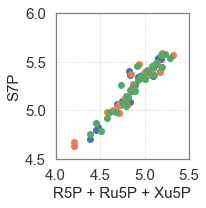

In [142]:
# read Sedoheptulose 7-phosphate 1
mData_s7p = mData.loc[mData['metabolite'] == 'Sedoheptulose 7-phosphate 1']
peakArea_s7p = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_s7p[:,col] = mData_s7p.loc[mData_s7p['mutant'] == mut_id,'peakArea']

# read pentose phosphate
mData_p5p = mData.loc[mData['metabolite'] == 'pentose 5-phosphate']
peakArea_p5p = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_p5p[:,col] = mData_p5p.loc[mData_p5p['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_s7p)
plt.ylabel("S7P",fontsize=ft)
df1 = np.log10(peakArea_p5p)
plt.xlabel("R5P + Ru5P + Xu5P",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4,5.5])
plt.ylim([4.5,6])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([4.5,5,5.5,6])
plt.xticks([4,4.5,5,5.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/p5p_s7p.svg', format='svg', dpi=1200)

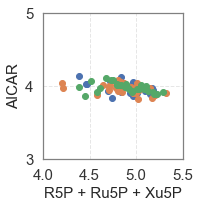

In [147]:
# read AICAR
mData_aicar = mData.loc[mData['metabolite'] == 'AICAR']
peakArea_aicar = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_aicar[:,col] = mData_aicar.loc[mData_aicar['mutant'] == mut_id,'peakArea']

# read pentose phosphate
mData_p5p = mData.loc[mData['metabolite'] == 'pentose 5-phosphate']
peakArea_p5p = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_p5p[:,col] = mData_p5p.loc[mData_p5p['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_aicar)
plt.ylabel("AICAR",fontsize=ft)
df1 = np.log10(peakArea_p5p)
plt.xlabel("R5P + Ru5P + Xu5P",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4,5.5])
plt.ylim([3,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3,4,5])
plt.xticks([4,4.5,5,5.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/p5p_aicar.svg', format='svg', dpi=1200)

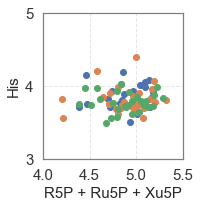

In [148]:
# read Histidine
mData_his = mData.loc[mData['metabolite'] == 'Histidine']
peakArea_his = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_his[:,col] = mData_his.loc[mData_his['mutant'] == mut_id,'peakArea']

# read pentose phosphate
mData_p5p = mData.loc[mData['metabolite'] == 'pentose 5-phosphate']
peakArea_p5p = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_p5p[:,col] = mData_p5p.loc[mData_p5p['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_his)
plt.ylabel("His",fontsize=ft)
df1 = np.log10(peakArea_p5p)
plt.xlabel("R5P + Ru5P + Xu5P",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4,5.5])
plt.ylim([3,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3,4,5])
plt.xticks([4,4.5,5,5.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/p5p_his.svg', format='svg', dpi=1200)

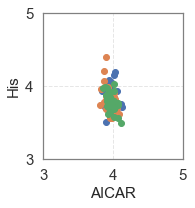

In [150]:
# read Histidine
mData_his = mData.loc[mData['metabolite'] == 'Histidine']
peakArea_his = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_his[:,col] = mData_his.loc[mData_his['mutant'] == mut_id,'peakArea']

# read AICAR
mData_aicar = mData.loc[mData['metabolite'] == 'AICAR']
peakArea_aicar = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_aicar[:,col] = mData_aicar.loc[mData_aicar['mutant'] == mut_id,'peakArea']

fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_his)
plt.ylabel("His",fontsize=ft)
df1 = np.log10(peakArea_aicar)
plt.xlabel("AICAR",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([3,5])
plt.ylim([3,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3,4,5])
plt.xticks([3,4,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/aicar_his.svg', format='svg', dpi=1200)

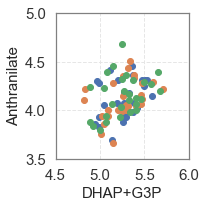

In [153]:
# read hexose Triose-P
mData_triop = mData.loc[mData['metabolite'] == 'glyceraldehyde3p']
peakArea_triop = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_triop[:,col] = mData_triop.loc[mData_triop['mutant'] == mut_id,'peakArea']

# read Anthranilate
mData_anthr = mData.loc[mData['metabolite'] == 'Anthranilate 1']
peakArea_anthr = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_anthr[:,col] = mData_anthr.loc[mData_anthr['mutant'] == mut_id,'peakArea']

fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_triop)
plt.xlabel("DHAP+G3P",fontsize=ft)
df2 = np.log10(peakArea_anthr)
plt.ylabel("Anthranilate",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4.5,6])
plt.ylim([3.5,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([4.5,5,5.5,6])
plt.yticks([3.5,4,4.5,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/triose_anthr.svg', format='svg', dpi=1200)

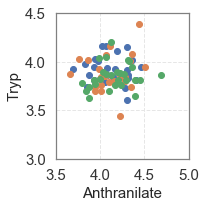

In [158]:
# read tryptophane
mData_tryp = mData.loc[mData['metabolite'] == 'tryptophane']
peakArea_tryp = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_tryp[:,col] = mData_tryp.loc[mData_tryp['mutant'] == mut_id,'peakArea']

# read Anthranilate
mData_anthr = mData.loc[mData['metabolite'] == 'Anthranilate 1']
peakArea_anthr = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_anthr[:,col] = mData_anthr.loc[mData_anthr['mutant'] == mut_id,'peakArea']

fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_tryp)
plt.ylabel("Tryp",fontsize=ft)
df1 = np.log10(peakArea_anthr)
plt.xlabel("Anthranilate",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([3,4.5])
plt.xlim([3.5,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3,3.5,4,4.5])
plt.xticks([3.5,4,4.5,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/anthr_tryp.svg', format='svg', dpi=1200)

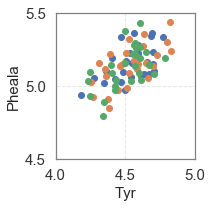

In [167]:
# read Phenylalanine
mData_pheala = mData.loc[mData['metabolite'] == 'Phenylalanine']
peakArea_pheala = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_pheala[:,col] = mData_pheala.loc[mData_pheala['mutant'] == mut_id,'peakArea']

# read Tyrosine
mData_tyr = mData.loc[mData['metabolite'] == 'Tyrosine']
peakArea_tyr = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_tyr[:,col] = mData_tyr.loc[mData_tyr['mutant'] == mut_id,'peakArea']

fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_pheala)
plt.ylabel("Pheala",fontsize=ft)
df1 = np.log10(peakArea_tyr)
plt.xlabel("Tyr",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([4.5,5.5])
plt.xlim([4,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([4.5,5,5.5])
plt.xticks([4,4.5,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/tyr_pheala.svg', format='svg', dpi=1200)

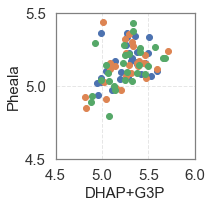

In [168]:
# read hexose Triose-P
mData_triop = mData.loc[mData['metabolite'] == 'glyceraldehyde3p']
peakArea_triop = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_triop[:,col] = mData_triop.loc[mData_triop['mutant'] == mut_id,'peakArea']

# read Phenylalanine
mData_pheala = mData.loc[mData['metabolite'] == 'Phenylalanine']
peakArea_pheala = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_pheala[:,col] = mData_pheala.loc[mData_pheala['mutant'] == mut_id,'peakArea']
    
fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_triop)
plt.xlabel("DHAP+G3P",fontsize=ft)
df2 = np.log10(peakArea_pheala)
plt.ylabel("Pheala",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4.5,6])
plt.ylim([4.5,5.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([4.5,5,5.5,6])
plt.yticks([4.5,5,5.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/triose_pheala.svg', format='svg', dpi=1200)

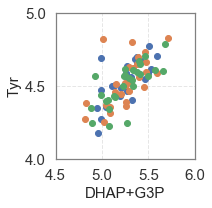

In [169]:
# read hexose Triose-P
mData_triop = mData.loc[mData['metabolite'] == 'glyceraldehyde3p']
peakArea_triop = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_triop[:,col] = mData_triop.loc[mData_triop['mutant'] == mut_id,'peakArea']

# read Tyrosine
mData_tyr = mData.loc[mData['metabolite'] == 'Tyrosine']
peakArea_tyr = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_tyr[:,col] = mData_tyr.loc[mData_tyr['mutant'] == mut_id,'peakArea']

fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_triop)
plt.xlabel("DHAP+G3P",fontsize=ft)
df2 = np.log10(peakArea_tyr)
plt.ylabel("Tyr",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4.5,6])
plt.ylim([4,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([4.5,5,5.5,6])
plt.yticks([4,4.5,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/triose_tyr.svg', format='svg', dpi=1200)

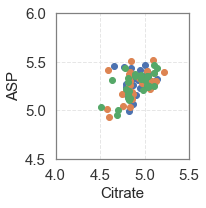

In [171]:
# read aspartate
mData_asp = mData.loc[mData['metabolite'] == 'aspartate']
peakArea_asp = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_asp[:,col] = mData_asp.loc[mData_asp['mutant'] == mut_id,'peakArea']

# read citrate
mData_cit = mData.loc[mData['metabolite'] == 'Citrate']
peakArea_cit = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_cit[:,col] = mData_cit.loc[mData_cit['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_cit)
plt.xlabel("Citrate",fontsize=ft)
df2 = np.log10(peakArea_asp)
plt.ylabel("ASP",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4,5.5])
plt.ylim([4.5,6])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([4,4.5,5,5.5])
plt.yticks([4.5,5,5.5,6])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/cit_asp.svg', format='svg', dpi=1200)

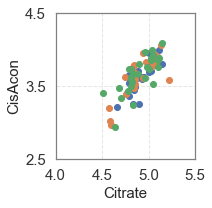

In [176]:
# read Cis-aconitate
mData_cisacon = mData.loc[mData['metabolite'] == 'Cis-aconitate']
peakArea_cisacon = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_cisacon[:,col] = mData_cisacon.loc[mData_cisacon['mutant'] == mut_id,'peakArea']

# read citrate
mData_cit = mData.loc[mData['metabolite'] == 'Citrate']
peakArea_cit = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_cit[:,col] = mData_cit.loc[mData_cit['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_cit)
plt.xlabel("Citrate",fontsize=ft)
df2 = np.log10(peakArea_cisacon)
plt.ylabel("CisAcon",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([4,5.5])
plt.ylim([2.5,4.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([4,4.5,5,5.5])
plt.yticks([2.5,3.5,4.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/cit_cisacon.svg', format='svg', dpi=1200)

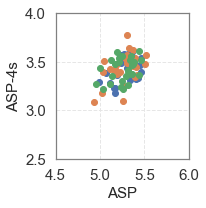

In [181]:
# read aspartate
mData_asp = mData.loc[mData['metabolite'] == 'aspartate']
peakArea_asp = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_asp[:,col] = mData_asp.loc[mData_asp['mutant'] == mut_id,'peakArea']

# read Aspartate 4-semialdehyde
mData_a4s = mData.loc[mData['metabolite'] == 'Aspartate 4-semialdehyde']
peakArea_a4s = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_a4s[:,col] = mData_a4s.loc[mData_a4s['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_a4s)
plt.ylabel("ASP-4s",fontsize=ft)
df1 = np.log10(peakArea_asp)
plt.xlabel("ASP",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([2.5,4])
plt.xlim([4.5,6])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([2.5,3,3.5,4])
plt.xticks([4.5,5,5.5,6])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/asp_asp4s.svg', format='svg', dpi=1200)

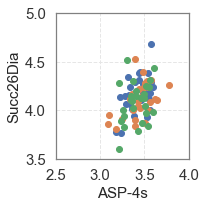

In [183]:
# read Succinyl-LL-2,6-diaminopimelate 1
mData_succ26dia = mData.loc[mData['metabolite'] == 'Succinyl-LL-2,6-diaminopimelate 1']
peakArea_succ26dia = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_succ26dia[:,col] = mData_succ26dia.loc[mData_succ26dia['mutant'] == mut_id,'peakArea']

# read Aspartate 4-semialdehyde
mData_a4s = mData.loc[mData['metabolite'] == 'Aspartate 4-semialdehyde']
peakArea_a4s = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_a4s[:,col] = mData_a4s.loc[mData_a4s['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_a4s)
plt.xlabel("ASP-4s",fontsize=ft)
df2 = np.log10(peakArea_succ26dia)
plt.ylabel("Succ26Dia",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([2.5,4])
plt.ylim([3.5,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([2.5,3,3.5,4])
plt.yticks([3.5,4,4.5,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/asp4s_succ26dia.svg', format='svg', dpi=1200)

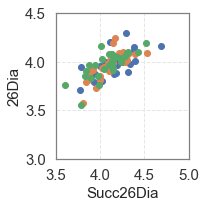

In [185]:
# read Succinyl-LL-2,6-diaminopimelate 1
mData_succ26dia = mData.loc[mData['metabolite'] == 'Succinyl-LL-2,6-diaminopimelate 1']
peakArea_succ26dia = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_succ26dia[:,col] = mData_succ26dia.loc[mData_succ26dia['mutant'] == mut_id,'peakArea']

# read 2,6-Diaminoheptanedioate 1
mData_26dia = mData.loc[mData['metabolite'] == '2,6-Diaminoheptanedioate 1']
peakArea_26dia = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_26dia[:,col] = mData_26dia.loc[mData_26dia['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_26dia)
plt.ylabel("26Dia",fontsize=ft)
df1 = np.log10(peakArea_succ26dia)
plt.xlabel("Succ26Dia",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([3,4.5])
plt.xlim([3.5,5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3,3.5,4,4.5])
plt.xticks([3.5,4,4.5,5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/succ26dia_26dia.svg', format='svg', dpi=1200)

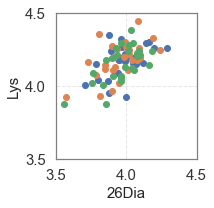

In [187]:
# read lysine
mData_lys = mData.loc[mData['metabolite'] == 'lysine']
peakArea_lys = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_lys[:,col] = mData_lys.loc[mData_lys['mutant'] == mut_id,'peakArea']

# read 2,6-Diaminoheptanedioate 1
mData_26dia = mData.loc[mData['metabolite'] == '2,6-Diaminoheptanedioate 1']
peakArea_26dia = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_26dia[:,col] = mData_26dia.loc[mData_26dia['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_26dia)
plt.xlabel("26Dia",fontsize=ft)
df2 = np.log10(peakArea_lys)
plt.ylabel("Lys",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([3.5,4.5])
plt.ylim([3.5,4.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([3.5,4,4.5])
plt.yticks([3.5,4,4.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/26dia_lys.svg', format='svg', dpi=1200)

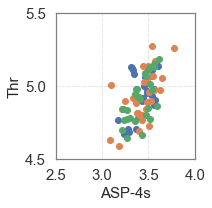

In [190]:
# read Threonine 1
mData_thre = mData.loc[mData['metabolite'] == 'Threonine 1']
peakArea_thre = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_thre[:,col] = mData_thre.loc[mData_thre['mutant'] == mut_id,'peakArea']

# read Aspartate 4-semialdehyde
mData_a4s = mData.loc[mData['metabolite'] == 'Aspartate 4-semialdehyde']
peakArea_a4s = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_a4s[:,col] = mData_a4s.loc[mData_a4s['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_a4s)
plt.xlabel("ASP-4s",fontsize=ft)
df2 = np.log10(peakArea_thre)
plt.ylabel("Thr",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([2.5,4])
plt.ylim([4.5,5.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([2.5,3,3.5,4])
plt.yticks([4.5,5,5.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/asp4s_thre.svg', format='svg', dpi=1200)

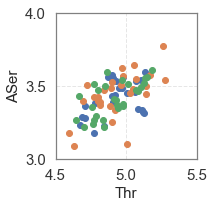

In [192]:
# read Threonine 1
mData_thre = mData.loc[mData['metabolite'] == 'Threonine 1']
peakArea_thre = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_thre[:,col] = mData_thre.loc[mData_thre['mutant'] == mut_id,'peakArea']

# read Acetylhomoserine 2
mData_aser = mData.loc[mData['metabolite'] == 'Acetylhomoserine 2']
peakArea_aser = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_aser[:,col] = mData_aser.loc[mData_aser['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_a4s)
plt.ylabel("ASer",fontsize=ft)
df1 = np.log10(peakArea_thre)
plt.xlabel("Thr",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([3,4])
plt.xlim([4.5,5.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3,3.5,4])
plt.xticks([4.5,5,5.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/thre_aser.svg', format='svg', dpi=1200)

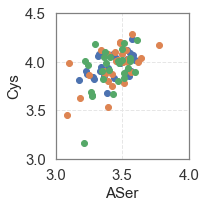

In [195]:
# read Cysteine
mData_cys = mData.loc[mData['metabolite'] == 'Cysteine']
peakArea_cys = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_cys[:,col] = mData_cys.loc[mData_cys['mutant'] == mut_id,'peakArea']

# read Acetylhomoserine 2
mData_aser = mData.loc[mData['metabolite'] == 'Acetylhomoserine 2']
peakArea_aser = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_aser[:,col] = mData_aser.loc[mData_aser['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_a4s)
plt.xlabel("ASer",fontsize=ft)
df2 = np.log10(peakArea_cys)
plt.ylabel("Cys",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([3,4])
plt.ylim([3,4.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([3,3.5,4])
plt.yticks([3,3.5,4,4.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/aser_cys.svg', format='svg', dpi=1200)

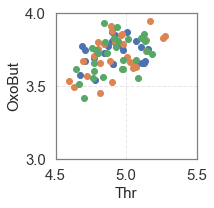

In [196]:
# read Threonine 1
mData_thre = mData.loc[mData['metabolite'] == 'Threonine 1']
peakArea_thre = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_thre[:,col] = mData_thre.loc[mData_thre['mutant'] == mut_id,'peakArea']

# read 2-Oxobutanoate 2
mData_2oxobut = mData.loc[mData['metabolite'] == '2-Oxobutanoate 2']
peakArea_2oxobut = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_2oxobut[:,col] = mData_2oxobut.loc[mData_2oxobut['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_2oxobut)
plt.ylabel("OxoBut",fontsize=ft)
df1 = np.log10(peakArea_thre)
plt.xlabel("Thr",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([3,4])
plt.xlim([4.5,5.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3,3.5,4])
plt.xticks([4.5,5,5.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/thre_2oxobut.svg', format='svg', dpi=1200)

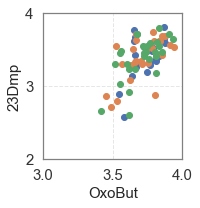

In [201]:
# read 2.3-Dihydrozy-2-methylpentanoate 2
mData_23dmp = mData.loc[mData['metabolite'] == '2.3-Dihydrozy-2-methylpentanoate 2']
peakArea_23dmp = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_23dmp[:,col] = mData_23dmp.loc[mData_23dmp['mutant'] == mut_id,'peakArea']

# read 2-Oxobutanoate 2
mData_2oxobut = mData.loc[mData['metabolite'] == '2-Oxobutanoate 2']
peakArea_2oxobut = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_2oxobut[:,col] = mData_2oxobut.loc[mData_2oxobut['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_2oxobut)
plt.xlabel("OxoBut",fontsize=ft)
df2 = np.log10(peakArea_23dmp)
plt.ylabel("23Dmp",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([3,4])
plt.ylim([2,4])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([3,3.5,4])
plt.yticks([2,3,4])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/2oxobut_23dmp.svg', format='svg', dpi=1200)

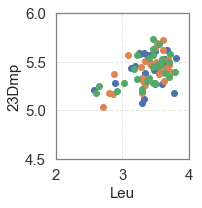

In [202]:
# read 2.3-Dihydrozy-2-methylpentanoate 2
mData_23dmp = mData.loc[mData['metabolite'] == '2.3-Dihydrozy-2-methylpentanoate 2']
peakArea_23dmp = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_23dmp[:,col] = mData_23dmp.loc[mData_23dmp['mutant'] == mut_id,'peakArea']

# read leucine
mData_leu = mData.loc[mData['metabolite'] == 'Leucine']
peakArea_leu = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_leu[:,col] = mData_leu.loc[mData_leu['mutant'] == mut_id,'peakArea']

fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_leu)
plt.xlabel("Leu",fontsize=ft)
df1 = np.log10(peakArea_23dmp)
plt.ylabel("23Dmp",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([4.5,6])
plt.xlim([2,4])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([4.5,5,5.5,6])
plt.xticks([2,3,4])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/23dmp_leu.svg', format='svg', dpi=1200)

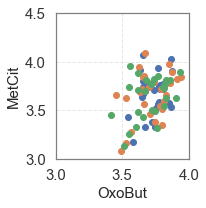

In [207]:
# read Methylcitrate 1
mData_metcit = mData.loc[mData['metabolite'] == 'Methylcitrate 1']
peakArea_metcit = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_metcit[:,col] = mData_metcit.loc[mData_metcit['mutant'] == mut_id,'peakArea']

# read 2-Oxobutanoate 2
mData_2oxobut = mData.loc[mData['metabolite'] == '2-Oxobutanoate 2']
peakArea_2oxobut = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_2oxobut[:,col] = mData_2oxobut.loc[mData_2oxobut['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_2oxobut)
plt.xlabel("OxoBut",fontsize=ft)
df2 = np.log10(peakArea_metcit)
plt.ylabel("MetCit",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([3,4])
plt.ylim([3,4.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([3,3.5,4])
plt.yticks([3,3.5,4,4.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/2oxobut_metcit.svg', format='svg', dpi=1200)

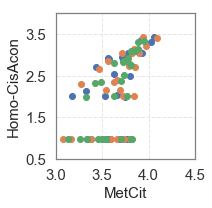

In [218]:
# read Methylcitrate 1
mData_metcit = mData.loc[mData['metabolite'] == 'Methylcitrate 1']
peakArea_metcit = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_metcit[:,col] = mData_metcit.loc[mData_metcit['mutant'] == mut_id,'peakArea']

# read Homo-cisaconitate 2
mData_hcisacon = mData.loc[mData['metabolite'] == 'Homo-cisaconitate 2']
peakArea_hcisacon = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_hcisacon[:,col] = mData_hcisacon.loc[mData_hcisacon['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_hcisacon)
plt.ylabel("Homo-CisAcon",fontsize=ft)
df1 = np.log10(peakArea_metcit)
plt.xlabel("MetCit",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([0.5,4])
plt.xlim([3,4.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([0.5,1.5,2.5,3.5])
plt.xticks([3,3.5,4,4.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/metcit_hcisacon.svg', format='svg', dpi=1200)

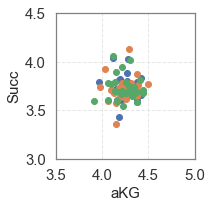

In [227]:
# read ketoglutarate
mData_2oxo = mData.loc[mData['metabolite'] == 'ketoglutarate']
peakArea_2oxo = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_2oxo[:,col] = mData_2oxo.loc[mData_2oxo['mutant'] == mut_id,'peakArea']

# read succinate
mData_succ = mData.loc[mData['metabolite'] == 'succinate']
peakArea_succ = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_succ[:,col] = mData_succ.loc[mData_succ['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df2 = np.log10(peakArea_succ)
plt.ylabel("Succ",fontsize=ft)
df1 = np.log10(peakArea_2oxo)
plt.xlabel("aKG",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.xlim([3.5,5])
plt.ylim([3.5,4.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.xticks([3.5,4,4.5,5])
plt.yticks([3.0,3.5,4.0,4.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/akg_succ.svg', format='svg', dpi=1200)

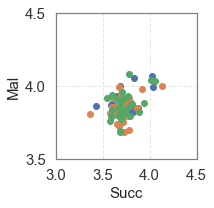

In [230]:
# read malate
mData_mal = mData.loc[mData['metabolite'] == 'malate']
peakArea_mal = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_mal[:,col] = mData_mal.loc[mData_mal['mutant'] == mut_id,'peakArea']

# read succinate
mData_succ = mData.loc[mData['metabolite'] == 'succinate']
peakArea_succ = np.zeros(shape=(3,len(mutant_id_jy)))
for col, mut_id in enumerate(mutant_id_jy):
    peakArea_succ[:,col] = mData_succ.loc[mData_succ['mutant'] == mut_id,'peakArea']


fig = plt.figure(figsize=(3,3))
ft=15
ax = fig.add_subplot(111)
df1 = np.log10(peakArea_succ)
plt.xlabel("Succ",fontsize=ft)
df2 = np.log10(peakArea_mal)
plt.ylabel("Mal",fontsize=ft)
h1 = plt.scatter(df1[0,:], df2[0,:], label = 'R1') # blue
h2 = plt.scatter(df1[1,:], df2[1,:], label = 'R2') # orange
h3 = plt.scatter(df1[2,:], df2[2,:], label = 'R3') # green 
plt.ylim([3.5,4.5])
plt.xlim([3.5,4.5])
plt.tight_layout()
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
ax.patch.set_facecolor('1')
plt.grid(b=True, which='major', color='0.9', linestyle='--')
plt.grid(b=True, which='minor', color='0.9', linestyle='--')
ax.tick_params(axis='x', colors='0.2', which='both', labelsize=15)
ax.tick_params(axis='y', colors='0.2', which='both', labelsize=15)
plt.yticks([3.5,4,4.5])
plt.xticks([3.0,3.5,4.0,4.5])
# ax.yaxis.label.set_color('0.9')
# ax.xaxis.label.set_color('0.9')
ax.margins(0.5)
# fig.patch.set_facecolor('0.15')
fig.savefig('../imag/metabolite_correlation/succ_mal.svg', format='svg', dpi=1200)